# Clustering Feature Requests into Common Requests

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
import nltk
import re

from nltk.collocations import *
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

% matplotlib inline

## Import and clean data

In [246]:
data = pd.read_csv('./data/feature_export.csv', usecols=[2,3],
                  names=['subject', 'description'],
                  header=0,
                  encoding='utf-8')

data = data.fillna('empty')
data.head()

,subject,description
0,Edit bank statement,"Hi Team,\n\nI need a healp please call me on t..."
1,Link a foreign supplier to a foreign currency ...,Hi \n\nWe have foreign supplier settle with di...
2,Edit User's Email Address?,"Good afternoon,\n\nIs there a way to edit a us..."
3,Allow only 3ds in stripe integration,Stripe informed Xero need to change Stripe int...
4,Vigilant Technologies,"Hi Support,\n\nPlease advise on the following:..."


In [247]:
print "Example case we want to clean:"
print
print 
print data.iloc[2]['description']

Example case we want to clean:


Good afternoon,

Is there a way to edit a users email address? I realize I can delete them
and re-add them but I don't want to go through that hassle if I can just
edit it.

Thank you!

Sincerely,

*Heather Cotie*

Event Coordinator, HR,

Social Media, Product Ambassador


www.sarafino.com

T  905 649 6467 ex. 6732

Like us on FACEBOOK <http://www.facebook.com/sarafinoeats>

Follow us on TWITTER <http://www.twitter.com/sarafinoeats>

Sign up for our NEWSLETTER
<http://sarafino.us4.list-manage1.com/subscribe?u=3e3542bde7e8ce3cdb8f28dfb&id=deafbcdceb>

Join us on a culinary tour in ITALY
<http://sarafino.us4.list-manage1.com/subscribe?u=3e3542bde7e8ce3cdb8f28dfb&id=deafbcdceb>


In [248]:
data['description'].head()

0    Hi Team,\n\nI need a healp please call me on t...
1    Hi \n\nWe have foreign supplier settle with di...
2    Good afternoon,\n\nIs there a way to edit a us...
3    Stripe informed Xero need to change Stripe int...
4    Hi Support,\n\nPlease advise on the following:...
Name: description, dtype: object

In [249]:
data['description'] = data['description'].str.replace(r'([a-z0-9_\.-]+)@([\da-z\.-]+)\.([a-z\.]{2,6})', '') # Removes emails

In [250]:
data['description'] = data['description'].str.replace(r'<(.*?)\>', '') # Needs punct to clean

In [251]:
data['description'] = data['description'].str.replace(r'[^\w\s]', '') 

In [252]:
data['description'] = data['description'].str.replace(r'www[a-z]+', '')

In [253]:
data['description'] = data['description'].str.replace(r'http[a-z]+', '')

In [254]:
data['description'] = data['description'].str.replace(r'https[a-z]+', '')

In [255]:
data['description'] = data['description'].str.replace(r'supportxerocom', '')

In [256]:
data['description'] = data['description'].str.replace(r'\d', '') # removes numbers eg phone numbers

In [257]:
data['description'] = data['description'].str.lower().str.split()

In [258]:
# Stem words for better model performance
stemmer = SnowballStemmer("english")
data['description'] = data['description'].apply(lambda x: [stemmer.stem(y) for y in x])

In [259]:
# Remove stopwords from text using NLTK.
stop = stopwords.words('english')
stop = stopwords.words('english')
stop.append('hello')
stop.append('hi')
stop.append('dear')
stop.append('sir')
stop.append('sirs')
stop.append('thank')
stop.append('facebook')
stop.append('twitter')
stop.append('linkedin') # Newly added

In [260]:
data['description'] = data['description'].apply(lambda x: [item for item in x if item not in stop])

In [261]:
print data.iloc[2]['description']

[u'good', u'afternoon', u'way', u'edit', u'user', u'email', u'address', u'realiz', u'delet', u'readd', u'dont', u'want', u'go', u'hassl', u'edit', u'sincer', u'heather', u'coti', u'event', u'coordin', u'hr', u'social', u'media', u'product', u'ambassador', u'ex', u'like', u'us', u'follow', u'us', u'sign', u'newslett', u'join', u'us', u'culinari', u'tour', u'itali']


In [262]:
#data.to_csv('./data/cleaned_feature.csv',
#           encoding='utf-8')

In [266]:
cleaned = pd.read_csv('./data/final_feature.csv', usecols=[1],
                     header=0)

cleaned = cleaned.fillna('empty')

cleaned.head()

,description
0,team need healp pleas call
1,foreign supplier settl differ foreign currenc ...
2,good afternoon way edit user email address rea...
3,stripe inform xero need chang stripe integr on...
4,support pleas advis follow tri connect dbs dir...


# K-Means Clustering

In [305]:
# Setup Vector
vectorizer = TfidfVectorizer(max_df=0.9,
                            min_df=2)
X = vectorizer.fit_transform(cleaned['description'])

In [306]:
X.shape

(2380, 3117)

Even by setting min_df=2 we drop the # of features from 13,000 to 4175. This saves on a lot of text cleaning.

In [307]:
true_k = 8 ## Randomly set to 8. Play around with clusters at later stage
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [308]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print


print("\n")
print("Prediction")

Y = vectorizer.transform(["invoice needs bigger logo"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["bank transaction doesn't have abiliy to edit"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["report with custom running balance"])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:  email  ani  intend  messag  confidenti  inform  recipi  may  pleas  copi
Cluster 1:  payment  invoic  batch  bill  bank  account  pay  await  show  supplier
Cluster 2:  bank  transact  account  reconcil  feed  rule  code  xero  statement  import
Cluster 3:  report  show  run  month  date  would  get  custom  way  xero
Cluster 4:  xero  would  account  client  way  use  regard  pleas  like  possibl
Cluster 5:  invoic  custom  sale  order  way  number  purchas  xero  date  would
Cluster 6:  email  send  quot  invoic  address  custom  xero  contact  sent  way
Cluster 7:  version  iphon  app  os  model  languag  usernam  ui  organis  name


Prediction
[4]
[2]
[3]


In [309]:
k_means_labels = model.labels_
k_means_labels

array([4, 4, 4, ..., 5, 5, 4])

In [310]:
unique, counts = np.unique(k_means_labels, return_counts=True)
dict(zip(unique, counts))

{0: 184, 1: 132, 2: 235, 3: 246, 4: 1001, 5: 379, 6: 164, 7: 39}

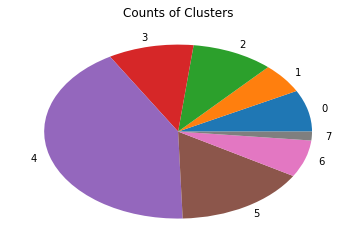

In [311]:
plt.pie(counts, labels=unique)
plt.title('Counts of Clusters')
plt.show()

# Hierarchical Clustering

In [288]:
from sklearn.cluster import AgglomerativeClustering

In [289]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=8)

In [290]:
result_clustering = clustering.fit(X.toarray())

In [291]:
cluster_labels = clustering.labels_

In [292]:
cluster_labels

array([3, 3, 3, ..., 0, 3, 3], dtype=int64)

In [293]:
unique, counts = np.unique(cluster_labels, return_counts=True)
dict(zip(unique, counts))

{0: 563, 1: 58, 2: 84, 3: 1143, 4: 173, 5: 36, 6: 167, 7: 156}

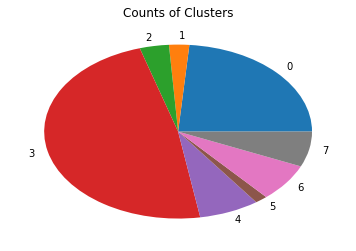

In [294]:
plt.pie(counts, labels=unique)
plt.title('Counts of Clusters')
plt.show()

# Non-negative Matrix Factorisation

The data in the form of a TF-IDF vector is naturally no negative as it's essentially just the word frequencies in Cases.

In [313]:
def display_topics(model, feature_names, top_words):
    """
    Function to print the top words of a given topic given a model
    """
    for topic_idx, topic in enumerate(model.components_):
        print "Topic %d:" % (topic_idx)
        print " ".join([feature_names[i]
                        for i in topic.argsort()[:-top_words - 1:-1]])

In [314]:
from sklearn.decomposition import NMF

In [318]:
nmf = NMF(n_components= 8,
          alpha=0.1)

In [319]:
nmf.fit(X)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=8, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [320]:
tfidf_feature_names = vectorizer.get_feature_names()
display_topics(nmf, tfidf_feature_names, top_words=15)

Topic 0:
xero client would file regard like use user access pleas help know possibl kind want
Topic 1:
email ani intend messag inform recipi confidenti pleas may attach copi contain receiv error notifi
Topic 2:
invoic custom payment sale send way date quot creat number email paid pay approv show
Topic 3:
report show run date month balanc custom get includ age period year see total sheet
Topic 4:
version app iphon ui os model languag usernam organis name devic deivc sent engb android
Topic 5:
account bank transact payment reconcil feed statement rule balanc credit show import code want card
Topic 6:
item line code descript inventori enter field add track would one default price column sale
Topic 7:
order purchas bill supplier number way approv alphabet date enter sale creat po deliveri month
